In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_5 = pd.read_csv('/Users/dominicprenovost/Programmation/Markowitz/5_Industry_Portfolios.CSV', header=6)

df_5 = selected_rows = df_5.iloc[1109:1169]

df_5 = df_5.rename(columns={'Unnamed: 0': 'Date'})

df_5['Date'] = pd.to_datetime(df_5['Date'], format='%Y%m')

df_5.set_index('Date', inplace=True)

df_5 =df_5.apply(pd.to_numeric, errors='coerce')

In [4]:
ret = df_5.values / 100

min_mu = -0.1
max_mu = 0.1
nb_pf = 100

target_ret = np.linspace(min_mu, max_mu, 100)

In [5]:
z_bar = np.transpose(np.mean(ret, axis=0, keepdims=True))
sigma = np.cov(ret, rowvar=False)

In [6]:
# Optimisation standard

from scipy.optimize import minimize

def negativeSR(w):
    w = np.array(w)
    R = np.sum(z_bar * w)
    V = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    SR = R/V
    return -1*SR

def check_sum(w):
    return np.sum(w) - 1

cons = ({'type': 'eq', 'fun': check_sum})

w0 = [0.2, 0.2, 0.2, 0.2, 0.2]

bnds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bnds, constraints=cons)
w_opt


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.1012917952935621
       x: [ 5.488e-02  3.020e-02  0.000e+00  9.149e-01  1.128e-17]
     nit: 5
     jac: [-1.534e-04 -1.082e-04  7.599e-02  1.279e-05  6.191e-02]
    nfev: 30
    njev: 5

In [7]:
np.sum(w_opt.x)

1.0

In [8]:
# Optimisation avec contraintes de non-négativité (short-selling interdit)

from scipy.optimize import minimize

def negativeSR(w):
    w = np.array(w)
    R = np.sum(z_bar * w)
    V = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    SR = R/V
    return -1*SR

def check_sum(w):
    return np.sum(w) - 1

def non_negative(w):
    return w

cons = ({'type': 'eq', 'fun': check_sum},
        {'type': 'ineq', 'fun': non_negative})

w0 = [0.2, 0.2, 0.2, 0.2, 0.2]

bnds = ((0, None), (0, None), (0, None), (0, None), (0, None))

w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bnds, constraints=cons)
w_opt.x


array([5.48783807e-02, 3.01969866e-02, 6.07153217e-18, 9.14924633e-01,
       1.99493200e-17])

In [9]:
volatility_opt = []

def min_volatility(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    return V

def get_return(w):
    w = np.array(w)
    R = np.sum(z_bar * w)
    return R

for R in range(len(target_ret)):
    cons = ({'type': 'eq', 'fun': check_sum},
            {'type': 'eq', 'fun': lambda w: get_return(w) - R})
    w0 = [0.2, 0.2, 0.2, 0.2, 0.2]
    w_opt = minimize(min_volatility, w0, method='SLSQP', bounds=bnds, constraints=cons)
    volatility_opt.append(np.sqrt(np.dot(w_opt.x.T, np.dot(sigma, w_opt.x))))

In [13]:
volatility_opt = []

def min_volatility(w):
    w = np.array(w)
    V = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
    return V

def get_return(w):
    w = np.array(w)
    R = np.sum(z_bar * w)
    return R

for R in range(len(target_ret)):
    cons = ({'type': 'eq', 'fun': check_sum},
            {'type': 'eq', 'fun': lambda w: target_ret[R] - get_return(w)})
    w0 = [0.2, 0.2, 0.2, 0.2, 0.2]
    w_opt = minimize(min_volatility, w0, method='SLSQP', bounds=bnds, constraints=cons)
    volatility_opt.append(np.sqrt(np.dot(w_opt.x.T, np.dot(sigma, w_opt.x))))

In [14]:
volatility_opt

[0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.054102373078898876,
 0.05410237

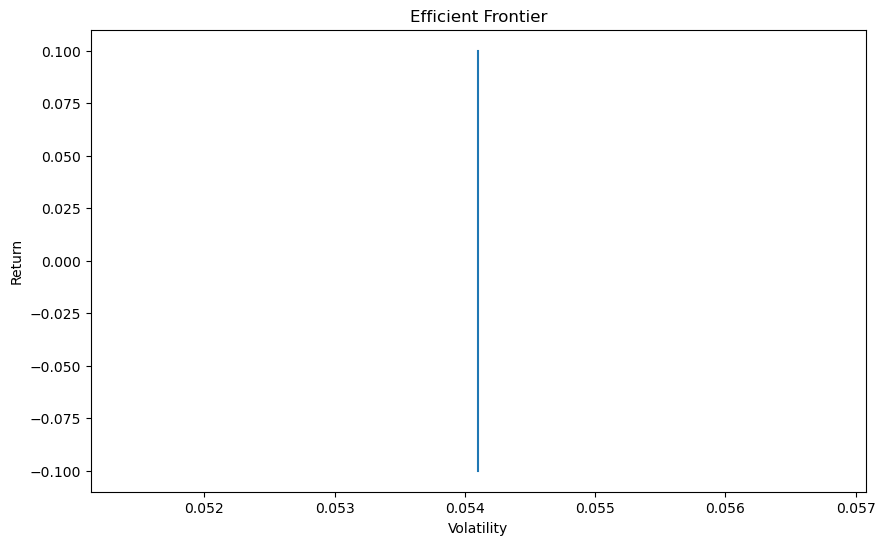

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(volatility_opt, target_ret)
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()
